In [1]:
from matplotlib.widgets import PolygonSelector
from matplotlib.patches import Polygon
from matplotlib.widgets import Button
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import fcsparser
import os

In [2]:
folder_path = './data/'

In [3]:
# Get all FCS files in the folder
fcs_files = [filename for filename in os.listdir(folder_path) if filename.endswith('.fcs')]

In [4]:
# Number of rows and columns for subplots (adjust based on the number of files)
ncols = 5
nrows = (len(fcs_files) + ncols - 1) // ncols  # Calculate number of rows needed for subplots

Plotting FCS files:   0%|          | 0/7 [00:00<?, ?it/s]

Encountered an illegal utf-8 byte in the header.
 Illegal utf-8 characters will be ignored.
'utf-8' codec can't decode byte 0xc9 in position 64: invalid continuation byte
Encountered an illegal utf-8 byte in the header.
 Illegal utf-8 characters will be ignored.
'utf-8' codec can't decode byte 0xc9 in position 64: invalid continuation byte
Encountered an illegal utf-8 byte in the header.
 Illegal utf-8 characters will be ignored.
'utf-8' codec can't decode byte 0xc9 in position 66: invalid continuation byte
C:\Users\alber\.conda\envs\jupyterlab\Lib\site-packages\fcsparser\api.py:490: UserWarning: The default channel names (defined by the $PnS parameter in the FCS file) were not unique. To avoid problems in downstream analysis, the channel names have been switched to the alternate channel names defined in the FCS file. To avoid seeing this warning message, explicitly instruct the FCS parser to use the alternate channel names by specifying the channel_naming parameter.
  warnings.warn(ms

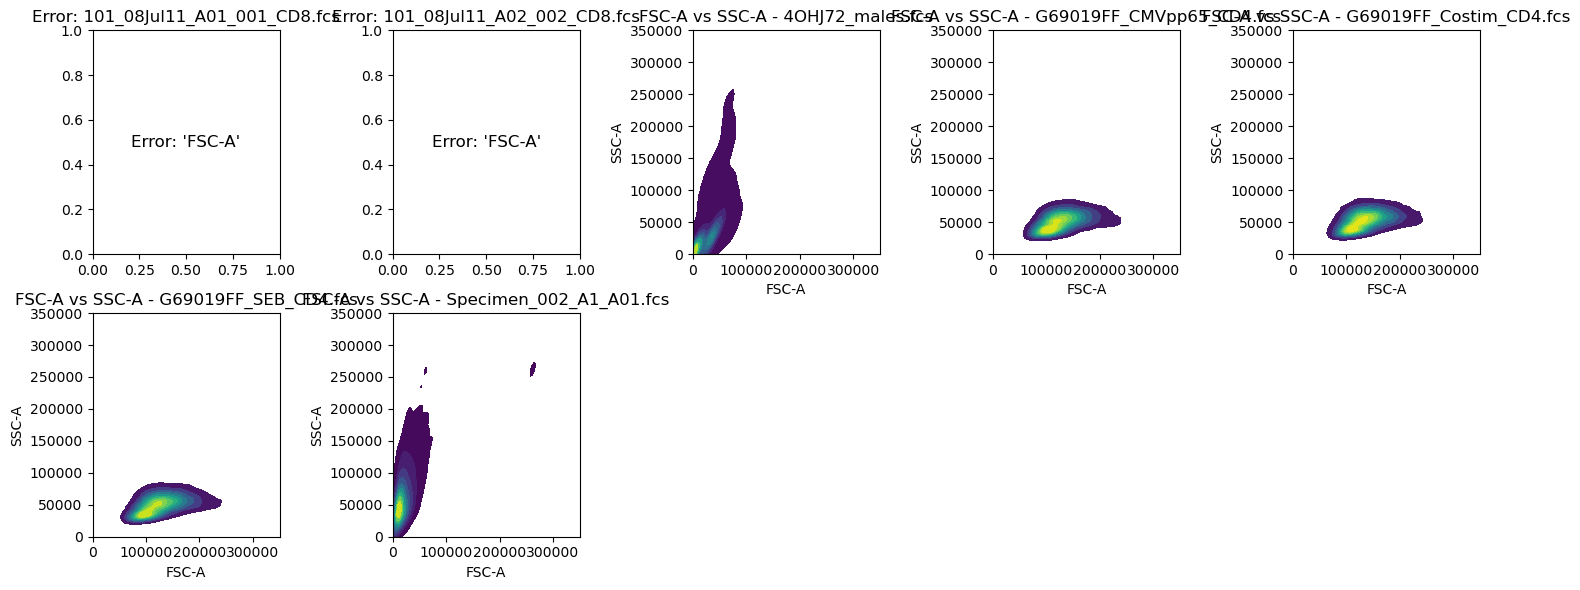

In [5]:
# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 3 * nrows))
fig.tight_layout(pad=3.0)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each FCS file and create the plots with progress bar
for i, filename in tqdm(enumerate(fcs_files), total=len(fcs_files), desc="Plotting FCS files"):
    ax = axes[i]
    file_path = os.path.join(folder_path, filename)
    
    try:
        # Parse the FCS file
        meta, data = fcsparser.parse(file_path, channel_naming="$PnS")  # channel_naming must be either "$PnN" or "$PnS"
        data.columns = data.columns.str.strip("'")  # Strip any leading or trailing single quotes in column names
        
        # Plot FSC-A vs SSC-A for each file
        sns.kdeplot(x=data['FSC-A'], y=data['SSC-A'], fill=True, cmap='viridis', ax=ax)
        
        ax.set_xlim(0, 350000); ax.set_ylim(0, 350000)  # Linear scale for FSC-A and SSC-A
        
        ax.set_xlabel('FSC-A'); ax.set_ylabel('SSC-A')
        ax.set_title(f'FSC-A vs SSC-A - {filename}')
        
    except Exception as e:
        ax.set_title(f"Error: {filename}")
        ax.text(0.5, 0.5, f"Error: {str(e)}", ha='center', va='center', fontsize=12)

# Hide any empty subplots if the number of files doesn't fill the grid
for j in range(len(fcs_files), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()